In [1]:
!pip install --upgrade pip
!pip install jax[cuda11_cudnn805] -f https://storage.googleapis.com/jax-releases/jax_releases.html
!pip install --upgrade git+https://github.com/matthias-wright/flaxmodels.git

     |████████████████████████████████| 2.1 MB 26.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in links: https://storage.googleapis.com/jax-releases/jax_releases.html
  Cloning https://github.com/matthias-wright/flaxmodels.git to /tmp/pip-req-build-9v1687sx
  Running command git clone --filter=blob:none --quiet https://github.com/matthias-wright/flaxmodels.git /tmp/pip-req-build-9v1687sx
  Resolved https://github.com/matthias-wright/flaxmodels.git to commit 0da171345546b63eb33c094306c1102b0a35e667
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.4/186.4 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

<h2><b>Download example image and labels.</b></h2>

In [2]:
import requests
import json

response = requests.get('https://cdn.pixabay.com/photo/2013/05/29/22/25/elephant-114543_960_720.jpg')
with open('example.jpg', 'wb') as f:
    f.write(response.content)

response = requests.get('https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json')
with open('labels.json', 'w') as f:
    f.write(response.text)

labels = json.load(open('labels.json'))

# Get classifier scores

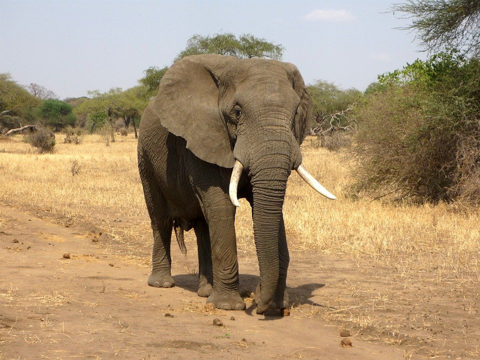

1. African bush elephant
2. tusker
3. Asian elephant
4. water buffalo
5. triceratops


In [4]:
from PIL import Image
import jax
import jax.numpy as jnp
import flaxmodels as fm


# Load image
img = Image.open('example.jpg')
display(img.resize((480, 360)))

# Image must be 224x224 if classification head is included
img = img.resize((224, 224))
# Image should be in range [0, 1]
x = jnp.array(img, dtype=jnp.float32) / 255.0
# Add batch dimension
x = jnp.expand_dims(x, axis=0)

vgg16 = fm.VGG16(output='logits', pretrained='imagenet')
init_rngs = {'params': jax.random.PRNGKey(0), 'dropout': jax.random.PRNGKey(1)}
params = vgg16.init(init_rngs, x)
out = vgg16.apply(params, x, train=False)

# Get top 5 classes
_, top5_classes = jax.lax.top_k(out, k=5)
top5_classes = jnp.squeeze(top5_classes, axis=0)

for i in range(top5_classes.shape[0]):
    print(f'{i + 1}.', labels[top5_classes[i]])

# Get activations (including classifier scores)

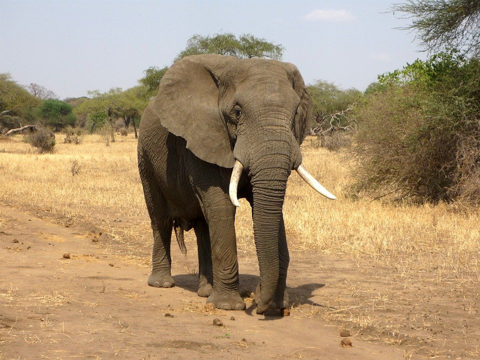

conv1_1 (1, 224, 224, 64)
relu1_1 (1, 224, 224, 64)
conv1_2 (1, 224, 224, 64)
relu1_2 (1, 224, 224, 64)
conv2_1 (1, 112, 112, 128)
relu2_1 (1, 112, 112, 128)
conv2_2 (1, 112, 112, 128)
relu2_2 (1, 112, 112, 128)
conv3_1 (1, 56, 56, 256)
relu3_1 (1, 56, 56, 256)
conv3_2 (1, 56, 56, 256)
relu3_2 (1, 56, 56, 256)
conv3_3 (1, 56, 56, 256)
relu3_3 (1, 56, 56, 256)
conv4_1 (1, 28, 28, 512)
relu4_1 (1, 28, 28, 512)
conv4_2 (1, 28, 28, 512)
relu4_2 (1, 28, 28, 512)
conv4_3 (1, 28, 28, 512)
relu4_3 (1, 28, 28, 512)
conv5_1 (1, 14, 14, 512)
relu5_1 (1, 14, 14, 512)
conv5_2 (1, 14, 14, 512)
relu5_2 (1, 14, 14, 512)
conv5_3 (1, 14, 14, 512)
relu5_3 (1, 14, 14, 512)
fc6 (1, 4096)
relu6 (1, 4096)
fc7 (1, 4096)
relu7 (1, 4096)
fc8 (1, 1000)


In [5]:
from PIL import Image
import jax
import jax.numpy as jnp
import flaxmodels as fm


# Load image
img = Image.open('example.jpg')
display(img.resize((480, 360)))

# Image must be 224x224 if classification head is included
img = img.resize((224, 224))
# Image should be in range [0, 1]
x = jnp.array(img, dtype=jnp.float32) / 255.0
# Add batch dimension
x = jnp.expand_dims(x, axis=0)

vgg16 = fm.VGG16(output='activations', pretrained='imagenet')
init_rngs = {'params': jax.random.PRNGKey(0), 'dropout': jax.random.PRNGKey(1)}
params = vgg16.init(init_rngs, x)
out = vgg16.apply(params, x, train=False)

for key in out.keys():
    print(key, out[key].shape)

# Get activations for image of arbitrary size

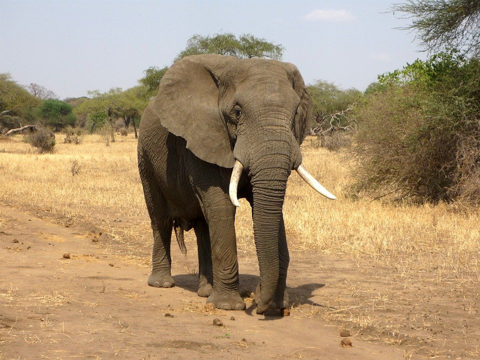

conv1_1 (1, 720, 960, 64)
relu1_1 (1, 720, 960, 64)
conv1_2 (1, 720, 960, 64)
relu1_2 (1, 720, 960, 64)
conv2_1 (1, 360, 480, 128)
relu2_1 (1, 360, 480, 128)
conv2_2 (1, 360, 480, 128)
relu2_2 (1, 360, 480, 128)
conv3_1 (1, 180, 240, 256)
relu3_1 (1, 180, 240, 256)
conv3_2 (1, 180, 240, 256)
relu3_2 (1, 180, 240, 256)
conv3_3 (1, 180, 240, 256)
relu3_3 (1, 180, 240, 256)
conv4_1 (1, 90, 120, 512)
relu4_1 (1, 90, 120, 512)
conv4_2 (1, 90, 120, 512)
relu4_2 (1, 90, 120, 512)
conv4_3 (1, 90, 120, 512)
relu4_3 (1, 90, 120, 512)
conv5_1 (1, 45, 60, 512)
relu5_1 (1, 45, 60, 512)
conv5_2 (1, 45, 60, 512)
relu5_2 (1, 45, 60, 512)
conv5_3 (1, 45, 60, 512)
relu5_3 (1, 45, 60, 512)


In [6]:
from PIL import Image
import jax
import jax.numpy as jnp
import flaxmodels as fm

key = jax.random.PRNGKey(0)

# Load image
img = Image.open('example.jpg')
display(img.resize((480, 360)))

# Image should be in range [0, 1]
x = jnp.array(img, dtype=jnp.float32) / 255.0
# Add batch dimension
x = jnp.expand_dims(x, axis=0)

vgg16 = fm.VGG16(output='activations', include_head=False, pretrained='imagenet')
init_rngs = {'params': jax.random.PRNGKey(0), 'dropout': jax.random.PRNGKey(1)}
params = vgg16.init(init_rngs, x)
out = vgg16.apply(params, x, train=False)

for key in out.keys():
    print(key, out[key].shape)